In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from pathlib import Path


🔎 Loading Sample ID: img005


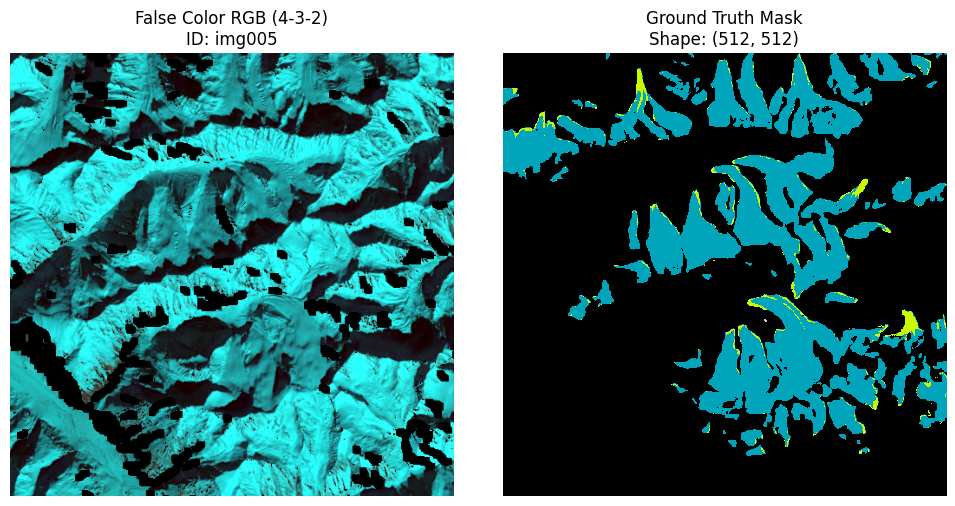

✅ Image Shape: (512, 512, 5)
✅ Label Unique Values: [  0  85 170 255]


In [2]:

# --- CONFIGURATION ---
BASE_DIR = Path(r"D:\GlacierHack_practice\Train")

def load_random_sample():
    # 1. Find all image IDs based on Band 1
    band1_dir = BASE_DIR / "Band1"
    if not band1_dir.exists():
        print(f"❌ Error: Directory not found at {band1_dir}")
        return

    all_files = list(band1_dir.glob("*.tif"))
    if not all_files:
        print("❌ No .tif files found!")
        return

    # 2. Pick a random ID
    random_file = random.choice(all_files)
    img_id = random_file.stem # e.g., "img_001"
    print(f"🔎 Loading Sample ID: {img_id}")

    # 3. Load all 5 Bands
    bands = []
    for i in range(1, 6):
        path = BASE_DIR / f"Band{i}" / f"{img_id}.tif"
        img = cv2.imread(str(path), cv2.IMREAD_UNCHANGED)
        
        if img is None:
            print(f"❌ Failed to load: {path}")
            return
        
        # Convert to float32 for calculations
        bands.append(img.astype(np.float32))

    # Stack into (H, W, 5)
    image_stack = np.stack(bands, axis=-1)

    # 4. Load Label
    label_path = BASE_DIR / "labels" / f"{img_id}.tif"
    label = cv2.imread(str(label_path), cv2.IMREAD_UNCHANGED)
    
    # 5. Visualization (Create RGB from Bands 4, 3, 2)
    rgb = image_stack[:, :, [3, 2, 1]]
    
    # Normalize RGB for display (Min-Max scaling)
    rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min() + 1e-6)
    
    # Plot
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(rgb)
    plt.title(f"False Color RGB (4-3-2)\nID: {img_id}")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    # Display label with a colormap
    plt.imshow(label, cmap='nipy_spectral', interpolation='nearest')
    plt.title(f"Ground Truth Mask\nShape: {label.shape}")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
    
    print(f"✅ Image Shape: {image_stack.shape}")
    print(f"✅ Label Unique Values: {np.unique(label)}")

if __name__ == "__main__":
    load_random_sample()